In [2]:
import pandas as pd
from datetime import datetime
import numpy as np
from pathlib import Path
import os
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

In [3]:
def calculate_statistics(folders: list):
    for i, folder in enumerate(folders):
        if i == 0:
            df = pd.read_csv(os.path.join(folder, 'metrics.csv'), index_col=0)
            df_agg = pd.read_csv(os.path.join(folder, 'agg_metrics.csv'), index_col=0)
            df_list = [df.values]
            df_agg_list = [df_agg.values]
        else:
            df = pd.read_csv(os.path.join(folder, 'metrics.csv'), index_col=0)
            df_agg = pd.read_csv(os.path.join(folder, 'agg_metrics.csv'), index_col=0)
            df_list.append(df.values)
            df_agg_list.append(df_agg.values)

    # Calculate mean
    df_mean = pd.DataFrame(sum(df_list) / len(folders), index=df.index, columns=df.columns)
    df_agg_mean = pd.DataFrame(sum(df_agg_list) / len(folders), index=df_agg.index, columns=df_agg.columns)
    
    # Calculate standard deviation
    df_std = pd.DataFrame(np.sqrt(sum((x - df_mean.values)**2 for x in df_list) / len(folders)), index=df.index, columns=df.columns)
    df_agg_std = pd.DataFrame(np.sqrt(sum((x - df_agg_mean.values)**2 for x in df_agg_list) / len(folders)), index=df_agg.index, columns=df_agg.columns)

    return df_mean, df_std, df_agg_mean, df_agg_std


### First fold

In [3]:
# folders = ['/home/users/qnguyen/Graph/save_inference_result/exp_02_01/',
#            '/home/users/qnguyen/Graph/save_inference_result/exp_02_02/',
#            '/home/users/qnguyen/Graph/save_inference_result/exp_02_03/',
#            '/home/users/qnguyen/Graph/save_inference_result/exp_02_04/',
#            '/home/users/qnguyen/Graph/save_inference_result/exp_02_05/']
folders = [
            '/home/users/qnguyen/Graph/save_inference_result/exp_01_01/',
           '/home/users/qnguyen/Graph/save_inference_result/exp_01_02/',
           '/home/users/qnguyen/Graph/save_inference_result/exp_01_03/',
           '/home/users/qnguyen/Graph/save_inference_result/exp_01_04/',
           '/home/users/qnguyen/Graph/save_inference_result/exp_01_05/']
df_mean, df_std, df_agg_mean, df_agg_std = calculate_statistics(folders)


In [37]:
df_mean_1 = df_mean * 1000
df_mean_1.loc['MAPE'] = df_mean_1.loc['MAPE'] / 10

In [38]:
df_std_1 = df_std * 1000
df_std_1.loc['MAPE'] = df_std_1.loc['MAPE'] / 10

In [39]:
df_agg_mean_1 = df_agg_mean * 1000
df_agg_mean_1.loc['MAPE'] = df_agg_mean_1.loc['MAPE'] / 10

In [40]:
df_agg_std_1 = df_agg_std * 1000 
df_agg_std_1.loc['MAPE'] = df_agg_std_1.loc['MAPE'] / 10

### Second fold

In [41]:
folders = ['/home/users/qnguyen/Graph/save_inference_result/exp_02_01/',
           '/home/users/qnguyen/Graph/save_inference_result/exp_02_02/',
           '/home/users/qnguyen/Graph/save_inference_result/exp_02_03/',
           '/home/users/qnguyen/Graph/save_inference_result/exp_02_04/',
           '/home/users/qnguyen/Graph/save_inference_result/exp_02_05/']
df_mean, df_std, df_agg_mean, df_agg_std = calculate_statistics(folders)

In [42]:
df_mean_2 = df_mean * 1000
df_mean_2.loc['MAPE'] = df_mean_2.loc['MAPE']/10

In [43]:
df_std_2 = df_std * 1000
df_std_2.loc['MAPE'] = df_std_2.loc['MAPE']/10

In [44]:
df_agg_mean_2 = df_agg_mean * 1000
df_agg_mean_2.loc['MAPE'] = df_agg_mean_2.loc['MAPE']/10

In [45]:
df_agg_std_2 = df_agg_std * 1000 
df_agg_std_2.loc['MAPE'] = df_agg_std_2.loc['MAPE']/10

### Third fold

In [22]:
folders = ['/home/users/qnguyen/Graph/save_inference_result/exp_03_01',
           '/home/users/qnguyen/Graph/save_inference_result/exp_03_02',
           '/home/users/qnguyen/Graph/save_inference_result/exp_03_03',
           '/home/users/qnguyen/Graph/save_inference_result/exp_03_04',
           '/home/users/qnguyen/Graph/save_inference_result/exp_03_05']
df_mean, df_std, df_agg_mean, df_agg_std = calculate_statistics(folders)

In [23]:
df_mean_3  = df_mean * 1000
df_mean_3.loc['MAPE'] = df_mean_3.loc['MAPE']/10

In [24]:
df_std_3 = df_std * 1000
df_std_3.loc['MAPE'] = df_std_3.loc['MAPE']/10

In [25]:
df_agg_mean_3 = df_agg_mean * 1000
df_agg_mean_3.loc['MAPE'] = df_agg_mean_3.loc['MAPE']/10

In [26]:
df_agg_std_3 = df_agg_std * 1000
df_agg_std_3.loc['MAPE'] = df_agg_std_3.loc['MAPE']/10

### Handle three tables

In [4]:
def concatenate_mean_std(df_mean, df_std):
    # Round up to 1 decimal place
    df_mean_rounded = df_mean.round(1)
    df_std_rounded = df_std.round(1)
    # Concatenate the rounded values
    concatenated = df_mean_rounded.astype(str)  + "(" +df_std_rounded.astype(str) + ")"
    return concatenated



In [ ]:
result_1 = concatenate_mean_std(df_mean_1, df_std_1)
result_2 = concatenate_mean_std(df_mean_2, df_std_2)
result_3 = concatenate_mean_std(df_mean_3, df_std_3)

final_result = pd.concat([result_1, result_2, result_3], axis=0, join="outer")

print(final_result)

In [52]:
final_result = final_result.T

In [53]:
print(final_result.to_latex())

\begin{tabular}{llllllllll}
\toprule
 & MAE & MAPE & RMSE & MAE & MAPE & RMSE & MAE & MAPE & RMSE \\
\midrule
GRUGCNModel & 90.6(0.3) & 46.1(1.1) & 193.9(0.4) & NaN & NaN & NaN & NaN & NaN & NaN \\
TGCNModel_2 & 89.7(0.3) & 45.1(0.5) & 194.6(0.5) & NaN & NaN & NaN & NaN & NaN & NaN \\
GraphConvLSTMModel & 90.1(0.5) & 45.3(0.5) & 194.2(0.4) & NaN & NaN & NaN & NaN & NaN & NaN \\
GraphWaveNetModel & 91.4(0.2) & 48.1(0.8) & 196.7(0.8) & 128.4(0.3) & 52.9(0.6) & 256.7(1.0) & 155.9(0.5) & 60.1(0.5) & 304.6(0.8) \\
RNNModel & 89.5(0.1) & 44.8(0.2) & 193.8(0.3) & 126.5(0.2) & 50.5(0.4) & 254.7(0.4) & 152.4(0.6) & 55.9(0.1) & 301.9(0.6) \\
VARModel & 134.3(0.2) & 109.5(0.5) & 218.5(0.3) & 167.6(0.1) & 106.7(0.2) & 283.9(0.4) & 210.1(0.5) & 134.7(0.5) & 335.0(0.6) \\
GatedGraphNetworkModel & 88.6(0.1) & 45.7(0.6) & 189.0(0.3) & 121.7(0.4) & 49.5(0.6) & 245.9(1.5) & 146.9(0.1) & 55.6(0.6) & 290.3(1.0) \\
AGCRNModel & 91.0(0.2) & 49.1(0.4) & 190.9(0.6) & 123.8(0.3) & 50.6(0.6) & 248.7(0.6) & 150.

### Print result in latex-friendly format

In [5]:
def error_by_gf_method(exps, methods):
    list_result_ind = []
    list_result_agg = [] 
    for method in methods:
        folders = [os.path.join('/home/users/qnguyen/Graph/save_inference_result/', exp, method) for exp in exps]
        results = calculate_statistics(folders)
        dfs = []
        for df in results:
            df = df * 1000
            df.loc['MAPE'] = df.loc['MAPE']/10
            dfs.append(df)
        result_ind = concatenate_mean_std(dfs[0], dfs[1])
        list_result_ind.append(result_ind.T)
        result_agg = concatenate_mean_std(dfs[2], dfs[3])
        list_result_agg.append(result_agg.T)
    error_ind_concat = pd.concat(list_result_ind, axis=0, join='outer')
    error_agg_concat = pd.concat(list_result_agg, axis=0, join='outer')
    return error_ind_concat, error_agg_concat


In [8]:
error_ind_1, error_agg_1 = error_by_gf_method(exps=['exp_01_01','exp_01_02','exp_01_03','exp_01_04','exp_01_05'], methods=['','correntropy','dtw','euclidean','pearson'])

In [9]:
print(error_ind_1.to_latex())

\begin{tabular}{llll}
\toprule
 & MAE & MAPE & RMSE \\
\midrule
GraphWaveNetModel & 91.4(0.2) & 48.3(0.8) & 196.7(0.7) \\
RNNModel & 89.5(0.1) & 44.7(0.3) & 194.0(0.5) \\
VARModel & 134.3(0.2) & 109.4(0.4) & 218.5(0.3) \\
GatedGraphNetworkModel & 88.6(0.1) & 45.7(0.6) & 188.8(0.5) \\
AGCRNModel & 90.9(0.2) & 49.0(0.4) & 190.8(0.6) \\
TransformerModel & 90.4(0.4) & 45.1(0.9) & 194.5(0.4) \\
BiPartiteSTGraphModel & 90.2(0.1) & 49.2(0.9) & 188.3(0.4) \\
SameHour & 114.4(0.0) & 66.4(0.0) & 238.6(0.0) \\
GRUGCNModel & 89.2(0.8) & 43.5(0.8) & 193.6(0.3) \\
TGCNModel_2 & 88.8(0.3) & 43.3(0.8) & 193.4(0.1) \\
TGCNModel & 88.2(0.2) & 43.6(0.4) & 191.9(0.2) \\
GRUGCNModel & 89.1(0.6) & 43.3(1.0) & 194.1(0.6) \\
TGCNModel_2 & 88.9(0.4) & 43.7(0.3) & 193.9(0.7) \\
TGCNModel & 88.2(0.2) & 43.5(0.5) & 192.5(0.5) \\
GRUGCNModel & 89.0(0.2) & 43.0(1.1) & 193.7(0.6) \\
TGCNModel_2 & 88.9(0.5) & 43.8(0.1) & 193.5(1.0) \\
TGCNModel & 88.4(0.2) & 43.5(0.9) & 192.5(0.6) \\
GRUGCNModel & 89.4(0.2) & 43.8(0.

In [11]:
print(error_agg_1.to_latex())

\begin{tabular}{llll}
\toprule
 & MAE & MAPE & RMSE \\
\midrule
GraphWaveNetModel & 8852.3(437.6) & 17.4(1.0) & 10336.5(440.2) \\
RNNModel & 8582.6(276.8) & 16.9(0.6) & 10080.4(285.0) \\
VARModel & 3439.8(22.7) & 7.1(0.0) & 4562.5(39.6) \\
GatedGraphNetworkModel & 8216.2(317.4) & 15.9(0.7) & 9801.8(273.1) \\
AGCRNModel & 7909.1(145.7) & 15.2(0.3) & 9427.3(190.6) \\
TransformerModel & 8827.3(369.0) & 17.3(0.6) & 10340.2(427.3) \\
BiPartiteSTGraphModel & 6614.5(348.2) & 13.1(0.8) & 8068.0(341.1) \\
SameHour & 3388.1(0.0) & 6.8(0.0) & 4574.1(0.0) \\
GRUGCNModel & 9266.6(154.2) & 18.1(0.4) & 10752.9(172.3) \\
TGCNModel_2 & 9268.4(260.1) & 18.1(0.5) & 10684.3(283.6) \\
TGCNModel & 8631.9(202.0) & 16.6(0.4) & 10173.6(208.0) \\
GRUGCNModel & 9557.0(516.1) & 18.7(1.1) & 11048.1(483.4) \\
TGCNModel_2 & 9248.8(291.0) & 18.0(0.5) & 10691.4(334.8) \\
TGCNModel & 8826.0(359.2) & 17.1(0.7) & 10249.9(378.8) \\
GRUGCNModel & 9383.2(566.2) & 18.2(1.2) & 10926.0(580.0) \\
TGCNModel_2 & 9037.7(340.2) & 1

In [11]:
error_ind_2, error_agg_2 = error_by_gf_method(exps=['exp_02_01','exp_02_02','exp_02_03','exp_02_04','exp_02_05'], methods=['','correntropy','dtw','euclidean','pearson'])

In [12]:
print(error_ind_2.to_latex())

\begin{tabular}{llll}
\toprule
 & MAE & MAPE & RMSE \\
\midrule
GraphWaveNetModel & 128.4(0.3) & 52.9(0.6) & 256.7(1.0) \\
RNNModel & 126.5(0.2) & 50.5(0.4) & 254.7(0.4) \\
VARModel & 167.6(0.1) & 106.7(0.2) & 283.9(0.4) \\
GatedGraphNetworkModel & 121.7(0.4) & 49.5(0.6) & 245.9(1.5) \\
AGCRNModel & 123.8(0.3) & 50.6(0.6) & 248.7(0.6) \\
TransformerModel & 127.9(0.5) & 52.1(0.4) & 255.4(0.5) \\
BiPartiteSTGraphModel & 121.6(0.1) & 49.4(0.5) & 246.0(0.8) \\
SameHour & 156.4(0.0) & 75.9(0.0) & 304.1(0.0) \\
GRUGCNModel & 125.3(0.2) & 50.0(0.2) & 251.4(0.5) \\
TGCNModel_2 & 125.9(0.5) & 49.7(0.6) & 253.7(1.1) \\
TGCNModel & 124.6(0.2) & 49.3(0.6) & 251.9(0.4) \\
GRUGCNModel & 125.3(0.2) & 51.1(0.5) & 251.0(0.7) \\
TGCNModel_2 & 126.1(0.2) & 50.6(0.6) & 253.6(0.6) \\
TGCNModel & 124.6(0.2) & 49.6(0.8) & 251.7(0.7) \\
GRUGCNModel & 125.1(0.2) & 50.3(0.6) & 250.6(0.6) \\
TGCNModel_2 & 125.7(0.3) & 50.0(0.4) & 253.0(0.4) \\
TGCNModel & 124.5(0.3) & 49.4(0.6) & 251.2(1.0) \\
GRUGCNModel & 126.

In [15]:
print(error_agg_2.to_latex())

\begin{tabular}{llll}
\toprule
 & MAE & MAPE & RMSE \\
\midrule
GraphWaveNetModel & 13908.5(468.0) & 19.2(0.9) & 17605.2(432.4) \\
RNNModel & 13489.2(166.1) & 18.8(0.3) & 16970.4(167.8) \\
VARModel & 13730.5(252.8) & 18.0(0.4) & 18669.1(273.7) \\
GatedGraphNetworkModel & 12787.0(562.2) & 16.9(0.7) & 16790.6(715.5) \\
AGCRNModel & 13264.5(345.9) & 17.9(0.5) & 17339.1(344.5) \\
TransformerModel & 13342.9(73.2) & 18.6(0.2) & 16909.1(46.5) \\
BiPartiteSTGraphModel & 12774.9(389.0) & 17.1(0.6) & 16559.8(423.0) \\
SameHour & 5478.3(0.0) & 8.2(0.0) & 7958.2(0.0) \\
GRUGCNModel & 12818.5(221.2) & 17.9(0.3) & 16227.1(242.3) \\
TGCNModel_2 & 13930.1(332.2) & 19.4(0.4) & 17580.1(406.7) \\
TGCNModel & 13543.2(305.0) & 18.5(0.4) & 17219.4(341.7) \\
GRUGCNModel & 12597.9(456.4) & 17.3(0.7) & 16145.7(460.9) \\
TGCNModel_2 & 13718.9(318.1) & 19.0(0.4) & 17420.9(366.8) \\
TGCNModel & 13316.4(412.7) & 18.2(0.7) & 17057.7(439.2) \\
GRUGCNModel & 12706.8(310.7) & 17.7(0.4) & 16171.3(404.7) \\
TGCNModel_2 

In [16]:
error_ind_3, error_agg_3 = error_by_gf_method(exps=['exp_03_01','exp_03_02','exp_03_03','exp_03_04','exp_03_05'], methods=['','correntropy','dtw','euclidean','pearson'])
print(error_ind_3.to_latex())

\begin{tabular}{llll}
\toprule
 & MAE & MAPE & RMSE \\
\midrule
GraphWaveNetModel & 161.6(12.4) & 64.2(8.4) & 315.2(21.5) \\
RNNModel & 153.1(1.7) & 56.9(2.2) & 302.2(0.9) \\
VARModel & 198.5(23.1) & 119.1(31.3) & 328.4(13.2) \\
GatedGraphNetworkModel & 159.5(25.4) & 71.5(31.8) & 299.2(18.0) \\
AGCRNModel & 149.4(1.5) & 58.2(1.0) & 293.6(1.6) \\
TransformerModel & 153.3(1.7) & 57.1(0.6) & 301.7(3.3) \\
BiPartiteSTGraphModel & 149.2(2.6) & 55.1(1.2) & 295.2(3.9) \\
SameHour & 178.7(15.3) & 75.5(11.3) & 345.6(25.2) \\
GRUGCNModel & 137.5(24.7) & 53.1(5.0) & 275.0(41.4) \\
TGCNModel_2 & 138.7(25.3) & 54.1(5.5) & 277.5(42.7) \\
TGCNModel & 136.8(24.3) & 52.7(4.7) & 274.9(41.4) \\
GRUGCNModel & 146.0(7.7) & 61.2(11.7) & 286.0(19.7) \\
TGCNModel_2 & 138.4(25.0) & 54.3(5.6) & 276.6(41.4) \\
TGCNModel & 145.6(7.3) & 61.9(11.4) & 285.8(19.4) \\
GRUGCNModel & 144.8(9.8) & 54.9(2.1) & 286.6(18.0) \\
TGCNModel_2 & 145.8(10.3) & 55.3(2.5) & 288.6(18.6) \\
TGCNModel & 144.1(9.9) & 54.3(2.8) & 286.9(

In [17]:
print(error_agg_3.to_latex())

\begin{tabular}{llll}
\toprule
 & MAE & MAPE & RMSE \\
\midrule
GraphWaveNetModel & 13206.6(3641.0) & 16.0(4.2) & 16387.4(3990.9) \\
RNNModel & 15072.7(658.4) & 17.9(1.0) & 18575.3(444.6) \\
VARModel & 10786.8(2450.3) & 12.9(2.8) & 14080.6(2493.0) \\
GatedGraphNetworkModel & 12738.7(1743.4) & 15.1(2.0) & 15780.6(1647.5) \\
AGCRNModel & 13240.2(297.0) & 15.5(0.3) & 16633.9(331.3) \\
TransformerModel & 15338.8(779.1) & 18.0(1.0) & 18905.6(797.1) \\
BiPartiteSTGraphModel & 14887.7(303.6) & 17.1(0.6) & 18457.6(249.5) \\
SameHour & 7952.3(3969.0) & 9.7(4.2) & 10685.3(4430.2) \\
GRUGCNModel & 13008.0(2169.5) & 16.8(0.5) & 15920.5(2871.2) \\
TGCNModel_2 & 13363.0(2345.8) & 17.3(0.4) & 16298.3(3070.1) \\
TGCNModel & 13233.9(2278.9) & 17.0(0.4) & 16194.4(3001.0) \\
GRUGCNModel & 12902.1(3312.5) & 16.2(2.3) & 16046.6(3534.7) \\
TGCNModel_2 & 13148.6(2093.8) & 17.1(0.8) & 16039.3(2704.0) \\
TGCNModel & 12609.8(2896.0) & 15.9(1.7) & 15795.3(3061.1) \\
GRUGCNModel & 13926.1(830.7) & 16.8(0.3) & 173

In [56]:
three_fold_ind = pd.concat([error_ind_1, error_ind_2, error_ind_3], axis=1)
print(three_fold_ind.to_latex())

\begin{tabular}{llllllllll}
\toprule
 & MAE & MAPE & RMSE & MAE & MAPE & RMSE & MAE & MAPE & RMSE \\
\midrule
GraphWaveNetModel & 91.4(0.2) & 48.3(0.8) & 196.7(0.7) & 128.4(0.3) & 52.9(0.6) & 256.7(1.0) & 161.6(12.4) & 64.2(8.4) & 315.2(21.5) \\
RNNModel & 89.5(0.1) & 44.7(0.3) & 194.0(0.5) & 126.5(0.2) & 50.5(0.4) & 254.7(0.4) & 153.1(1.7) & 56.9(2.2) & 302.2(0.9) \\
VARModel & 134.3(0.2) & 109.4(0.4) & 218.5(0.3) & 167.6(0.1) & 106.7(0.2) & 283.9(0.4) & 198.5(23.1) & 119.1(31.3) & 328.4(13.2) \\
GatedGraphNetworkModel & 88.6(0.1) & 45.7(0.6) & 188.8(0.5) & 121.7(0.4) & 49.5(0.6) & 245.9(1.5) & 159.5(25.4) & 71.5(31.8) & 299.2(18.0) \\
AGCRNModel & 90.9(0.2) & 49.0(0.4) & 190.8(0.6) & 123.8(0.3) & 50.6(0.6) & 248.7(0.6) & 149.4(1.5) & 58.2(1.0) & 293.6(1.6) \\
TransformerModel & 90.4(0.4) & 45.1(0.9) & 194.5(0.4) & 127.9(0.5) & 52.1(0.4) & 255.4(0.5) & 153.3(1.7) & 57.1(0.6) & 301.7(3.3) \\
BiPartiteSTGraphModel & 90.2(0.1) & 49.2(0.9) & 188.3(0.4) & 121.6(0.1) & 49.4(0.5) & 246.0(0.8

In [57]:
three_fold_agg = pd.concat([error_agg_1, error_agg_2, error_agg_3], axis=1)
print(three_fold_agg.to_latex())

\begin{tabular}{llllllllll}
\toprule
 & MAE & MAPE & RMSE & MAE & MAPE & RMSE & MAE & MAPE & RMSE \\
\midrule
GraphWaveNetModel & 8852.3(437.6) & 17.4(1.0) & 10336.5(440.2) & 13908.5(468.0) & 19.2(0.9) & 17605.2(432.4) & 13206.6(3641.0) & 16.0(4.2) & 16387.4(3990.9) \\
RNNModel & 8582.6(276.8) & 16.9(0.6) & 10080.4(285.0) & 13489.2(166.1) & 18.8(0.3) & 16970.4(167.8) & 15072.7(658.4) & 17.9(1.0) & 18575.3(444.6) \\
VARModel & 3439.8(22.7) & 7.1(0.0) & 4562.5(39.6) & 13730.5(252.8) & 18.0(0.4) & 18669.1(273.7) & 10786.8(2450.3) & 12.9(2.8) & 14080.6(2493.0) \\
GatedGraphNetworkModel & 8216.2(317.4) & 15.9(0.7) & 9801.8(273.1) & 12787.0(562.2) & 16.9(0.7) & 16790.6(715.5) & 12738.7(1743.4) & 15.1(2.0) & 15780.6(1647.5) \\
AGCRNModel & 7909.1(145.7) & 15.2(0.3) & 9427.3(190.6) & 13264.5(345.9) & 17.9(0.5) & 17339.1(344.5) & 13240.2(297.0) & 15.5(0.3) & 16633.9(331.3) \\
TransformerModel & 8827.3(369.0) & 17.3(0.6) & 10340.2(427.3) & 13342.9(73.2) & 18.6(0.2) & 16909.1(46.5) & 15338.8(779.

In [9]:
error_ind_5, error_agg_5 = error_by_gf_method(exps=['exp_05_01','exp_05_02','exp_05_03','exp_05_04'], methods=['','correntropy','dtw','euclidean','pearson'])

In [22]:
error_ind_5_new = error_ind_5.drop(index=("LastValue"))

In [20]:
error_ind_2_new = error_ind_2.drop(index=("SameHour"))

In [23]:
pd.concat([error_ind_2_new, error_ind_5_new], axis = 1)

,MAE,MAPE,RMSE,MAE,MAPE,RMSE
GraphWaveNetModel,128.4(0.3),52.9(0.6),256.7(1.0),128.3(0.6),52.6(0.9),256.3(1.3)
RNNModel,126.5(0.2),50.5(0.4),254.7(0.4),125.7(0.1),49.8(0.5),253.2(0.6)
VARModel,167.6(0.1),106.7(0.2),283.9(0.4),167.7(0.2),106.9(0.2),283.7(0.4)
GatedGraphNetworkModel,121.7(0.4),49.5(0.6),245.9(1.5),121.0(0.3),50.0(1.2),243.3(1.5)
AGCRNModel,123.8(0.3),50.6(0.6),248.7(0.6),123.5(0.1),50.7(0.4),248.1(0.4)
TransformerModel,127.9(0.5),52.1(0.4),255.4(0.5),128.5(0.6),51.8(0.4),256.2(0.9)
BiPartiteSTGraphModel,121.6(0.1),49.4(0.5),246.0(0.8),121.0(0.1),49.5(0.6),244.3(0.7)
GRUGCNModel,125.3(0.2),50.0(0.2),251.4(0.5),124.7(0.3),50.0(0.8),249.8(0.7)
TGCNModel_2,125.9(0.5),49.7(0.6),253.7(1.1),124.9(0.1),49.6(0.4),251.7(0.6)
TGCNModel,124.6(0.2),49.3(0.6),251.9(0.4),123.8(0.2),48.8(0.6),249.9(1.0)


#### Correntropy

In [14]:
def plot_multiple_time_series_w_different_colors(npy_files, labels=None, title="Multiple Time Series", xlabel="Time", ylabel="Value", length=None, series_index=0, start_time=None, time_step=None):
    """
    Plot multiple time series from a list of .npy files.

    Args:
        npy_files (list of str): List of paths to .npy files containing time series data.
        labels (list of str, optional): List of labels for each time series. Must match the length of npy_files.
        title (str, optional): Title of the plot. Defaults to "Multiple Time Series".
        xlabel (str, optional): Label for the x-axis. Defaults to "Time".
        ylabel (str, optional): Label for the y-axis. Defaults to "Value".
        length (int, optional): Number of time steps to plot. If None, the entire time series is plotted.
        series_index (int, optional): Index of the time series to select from each numpy array. Defaults to 0.
        start_time (datetime, optional): Start time for the x-axis ticks. If None, default numeric indices are used.
        time_step (timedelta, optional): Time step between consecutive time points. Required if start_time is provided.

    Returns:
        None
    """
    if labels is not None and len(labels) != len(npy_files):
        raise ValueError("The number of labels must match the number of npy files.")

    if start_time is not None and time_step is None:
        raise ValueError("time_step must be provided if start_time is specified.")

    plt.figure(figsize=(10, 6))
    color_cycle = plt.cm.tab20.colors  # Use a tab10 colormap for distinct colors

    for i, file in enumerate(npy_files):
        try:
            data = np.load(file)
            if data.ndim != 2:
                raise ValueError(f"File {file} does not contain a 2D array.")
            if series_index >= data.shape[1]:
                raise IndexError(f"Series index {series_index} is out of bounds for file {file} with shape {data.shape}.")

            series = data[:length, series_index]

            if start_time is not None:
                time_ticks = [start_time + j * time_step for j in range(len(series))]
            else:
                time_ticks = range(len(series))

            style = {"linestyle": "--", "linewidth": 2} if labels and labels[i] == "Ground Truth" else {}
            plt.plot(time_ticks, series, label=labels[i] if labels else f"Series {i+1}", color=color_cycle[i % len(color_cycle)], **style)
        except Exception as e:
            print(f"Error loading file {file}: {e}")

    if start_time is not None:
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M"))
        plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
        plt.gcf().autofmt_xdate()

    plt.title(title)
    plt.xlabel(xlabel, fontsize=14)  # Increased font size for x-axis label
    plt.ylabel(ylabel, fontsize=14)  # Increased font size for y-axis label
    if labels:
        plt.legend(fontsize=12)  # Adjusted font size for the legend
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('MAC000026.pdf')

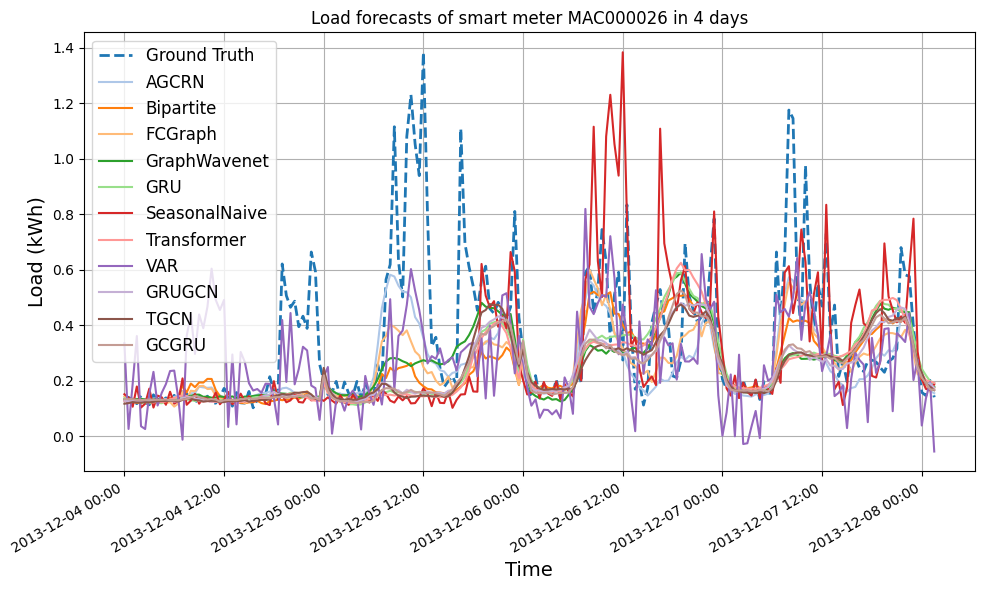

In [16]:
npy_files = [
                '/home/users/qnguyen/Graph/save_inference_result/exp_03_05/y.npy',
                '/home/users/qnguyen/Graph/save_inference_result/exp_03_05/y_hat_AGCRNModel.npy',
                '/home/users/qnguyen/Graph/save_inference_result/exp_03_05/y_hat_BiPartiteSTGraphModel.npy',
                '/home/users/qnguyen/Graph/save_inference_result/exp_03_05/y_hat_GatedGraphNetworkModel.npy',
                '/home/users/qnguyen/Graph/save_inference_result/exp_03_05/y_hat_GraphWaveNetModel.npy',
                '/home/users/qnguyen/Graph/save_inference_result/exp_03_05/y_hat_RNNModel.npy',
                '/home/users/qnguyen/Graph/save_inference_result/exp_03_05/y_hat_SameHour.npy',
                '/home/users/qnguyen/Graph/save_inference_result/exp_03_05/y_hat_TransformerModel.npy',
                '/home/users/qnguyen/Graph/save_inference_result/exp_03_05/y_hat_VARModel.npy',
                '/home/users/qnguyen/Graph/save_inference_result/exp_03_05/correntropy/y_hat_GRUGCNModel.npy',
                '/home/users/qnguyen/Graph/save_inference_result/exp_03_05/correntropy/y_hat_TGCNModel_2.npy',
                '/home/users/qnguyen/Graph/save_inference_result/exp_03_05/correntropy/y_hat_TGCNModel.npy'
            ]
labels = ['Ground Truth', 'AGCRN', 'Bipartite', 'FCGraph', 'GraphWavenet', 'GRU', 'SeasonalNaive', 'Transformer','VAR', 'GRUGCN', 'TGCN', 'GCGRU']
length = 196
start_time = datetime(2013,12,4,0,0,0)
time_step = timedelta(minutes=30)

plot_multiple_time_series_w_different_colors(npy_files=npy_files, labels=labels,length=length, series_index=0, start_time=start_time,
                                              time_step=time_step,title='Load forecasts of smart meter MAC000026 in 4 days',
                                              ylabel='Load (kWh)')


In [8]:
dataframe___ = pd.read_csv("/home/users/qnguyen/Graph/data/DataLCL_228houses_with_timeslot_temperature.csv")

In [9]:
dataframe___

,ds,MAC000026,MAC000052,MAC000073,MAC000079,MAC000084,MAC000085,MAC000105,MAC000155,MAC000194,...,MAC005280,MAC005324,MAC005349,MAC005354,MAC005380,MAC005504,MAC005517,time_slot,Temperature,weekday
0,2013-01-01 00:30:00,0.131,0.114,0.066,0.380,0.310,0.583,1.078,0.284,0.082,...,0.154,0.097,0.035,0.125,0.032,0.093,0.043,1,10.0,1
1,2013-01-01 01:00:00,0.165,0.054,0.050,0.343,0.229,0.610,1.069,0.398,0.093,...,0.191,0.123,0.019,0.230,0.035,0.042,0.068,2,9.0,1
2,2013-01-01 01:30:00,0.163,0.111,0.059,0.365,0.190,1.167,1.120,0.257,0.075,...,0.150,0.149,0.038,0.196,0.026,0.068,0.070,3,9.0,1
3,2013-01-01 02:00:00,0.131,0.070,0.051,0.341,0.199,0.843,1.076,0.264,0.112,...,0.203,0.124,0.050,0.207,0.032,0.040,0.056,4,9.0,1
4,2013-01-01 02:30:00,0.130,0.059,0.066,0.185,0.183,0.149,1.100,0.178,0.085,...,0.177,0.099,0.031,0.225,0.043,0.074,0.064,5,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17514,2013-12-31 21:30:00,0.162,0.656,0.225,1.241,0.390,0.099,0.300,0.418,0.075,...,0.291,0.361,0.025,1.043,0.384,0.065,0.029,43,7.0,1
17515,2013-12-31 22:00:00,0.097,0.688,0.213,0.961,0.408,0.101,0.270,0.381,0.118,...,0.266,0.280,0.026,0.396,0.309,0.045,0.029,44,7.0,1
17516,2013-12-31 22:30:00,0.126,0.622,0.207,0.445,0.388,0.082,0.293,0.323,0.108,...,0.259,0.239,0.025,0.459,0.706,0.073,0.008,45,7.0,1
17517,2013-12-31 23:00:00,0.140,0.683,0.151,0.421,0.364,0.081,0.304,0.345,0.123,...,0.234,0.140,0.060,0.266,0.296,0.079,0.029,46,8.0,1
